In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')

features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)

tracks.shape

(99404, 16)

In [3]:
tracks.head(20) #Display the first 5 objects of the dataset

,track_id,album_date_released_year,artist_location,album_information,artist_bio,artist_website,album_tracks,album_title,track_genres,track_bit_rate,artist_name,artist_comments,album_date_created_day,album_date_released_day,album_tags,Attribution-Noncommercial-Share Alike 3.0 United States
0,2,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
1,3,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
2,5,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0
3,10,2008,325,310,1623,1053,2,2119,713,192000,7052,3,26,6,2285,0
4,20,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,2285,0
5,26,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,2285,0
6,30,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,2285,0
7,46,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,2285,0
8,48,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,2285,0
9,134,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2285,0


In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99404 entries, 0 to 99403
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   track_id                                                 99404 non-null  int64
 1   album_date_released_year                                 99404 non-null  int64
 2   artist_location                                          99404 non-null  int64
 3   album_information                                        99404 non-null  int64
 4   artist_bio                                               99404 non-null  int64
 5   artist_website                                           99404 non-null  int64
 6   album_tracks                                             99404 non-null  int64
 7   album_title                                              99404 non-null  int64
 8   track_genres                                  

Split the dataset into 70% train and 30% test

In [5]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'

attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes]
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [6]:
scaler = MinMaxScaler()
X_tr_sc = scaler.fit_transform(X_train)
df_tr_sc = pd.DataFrame(X_tr_sc)
X_te_sc = scaler.fit_transform(X_test)
df_te_sc = pd.DataFrame(X_te_sc)
X_sc = scaler.fit_transform(X)
df_sc = pd.DataFrame(X_sc)

**DBSCAN**

In [7]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS
import seaborn as sns

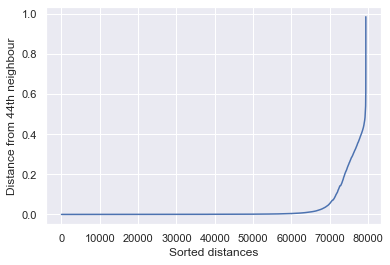

In [8]:
sns.set()
neigh = NearestNeighbors(n_neighbors=32)
nbrs = neigh.fit(X_sc)
distances, indices = nbrs.kneighbors(X_sc)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances[20000:])
plt.ylabel('Distance from 44th neighbour')
plt.xlabel('Sorted distances')
plt.show()

In [9]:
dbscan = DBSCAN(eps=0.20, min_samples=32)
dbscan.fit(X_sc)

DBSCAN(eps=0.4, min_samples=32)

In [10]:
np.unique(dbscan.labels_, return_counts=True)

(array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
         51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176

In [11]:
tracks['outliers'] = np.nan
tracks['label'] = dbscan.labels_
for i in range(0,len(tracks)):
    if tracks['label'][i] == -1:
        tracks['outliers'][i] = 1
    else:
        tracks['outliers'][i] = 0

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


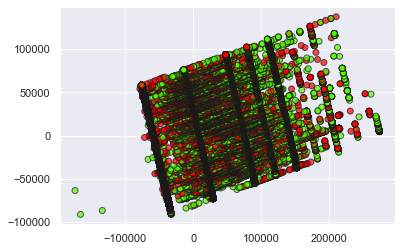

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tracks['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

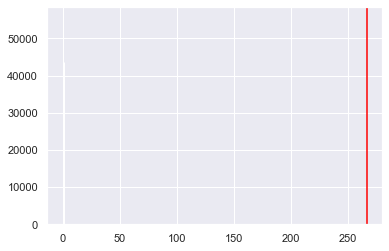

In [13]:
plt.hist(tracks['outliers'])
plt.axvline(np.max(dbscan.labels_[np.where(tracks['outliers']==0)]), c='red')
#plt.text(-2, 600, 'outliers')
plt.show()

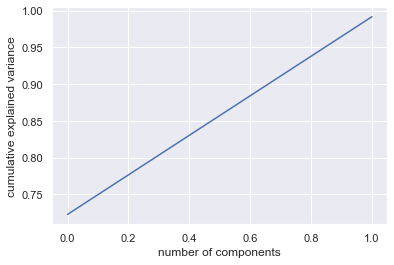

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

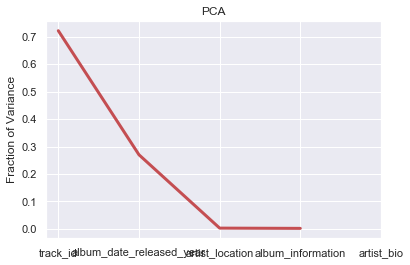

In [15]:
plt.plot(PCA(n_components=4).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(5), attributes)
plt.show()
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tracks['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
#plt.show()

**BOX PLOT**

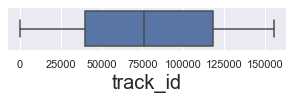

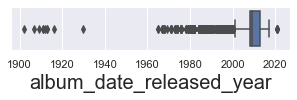

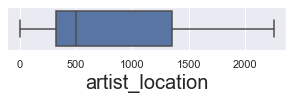

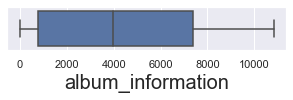

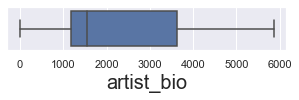

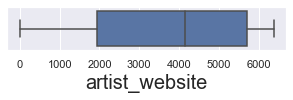

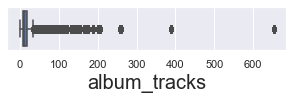

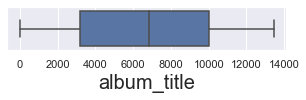

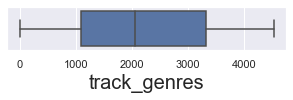

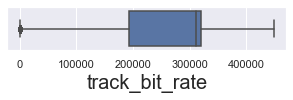

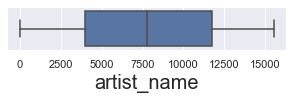

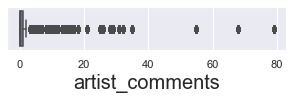

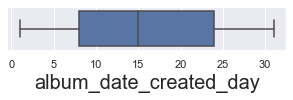

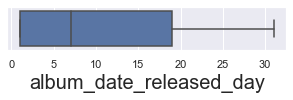

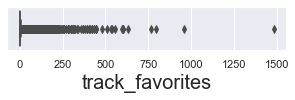

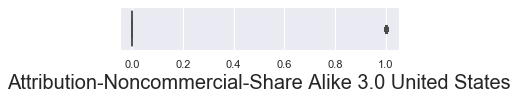

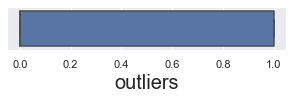

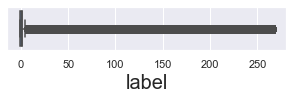

In [16]:
for column in tracks.columns:
    f,ax = plt.subplots(figsize=(5,0.8))
    ax = sns.boxplot(x=tracks[column])
    plt.xlabel(column, fontsize=20)

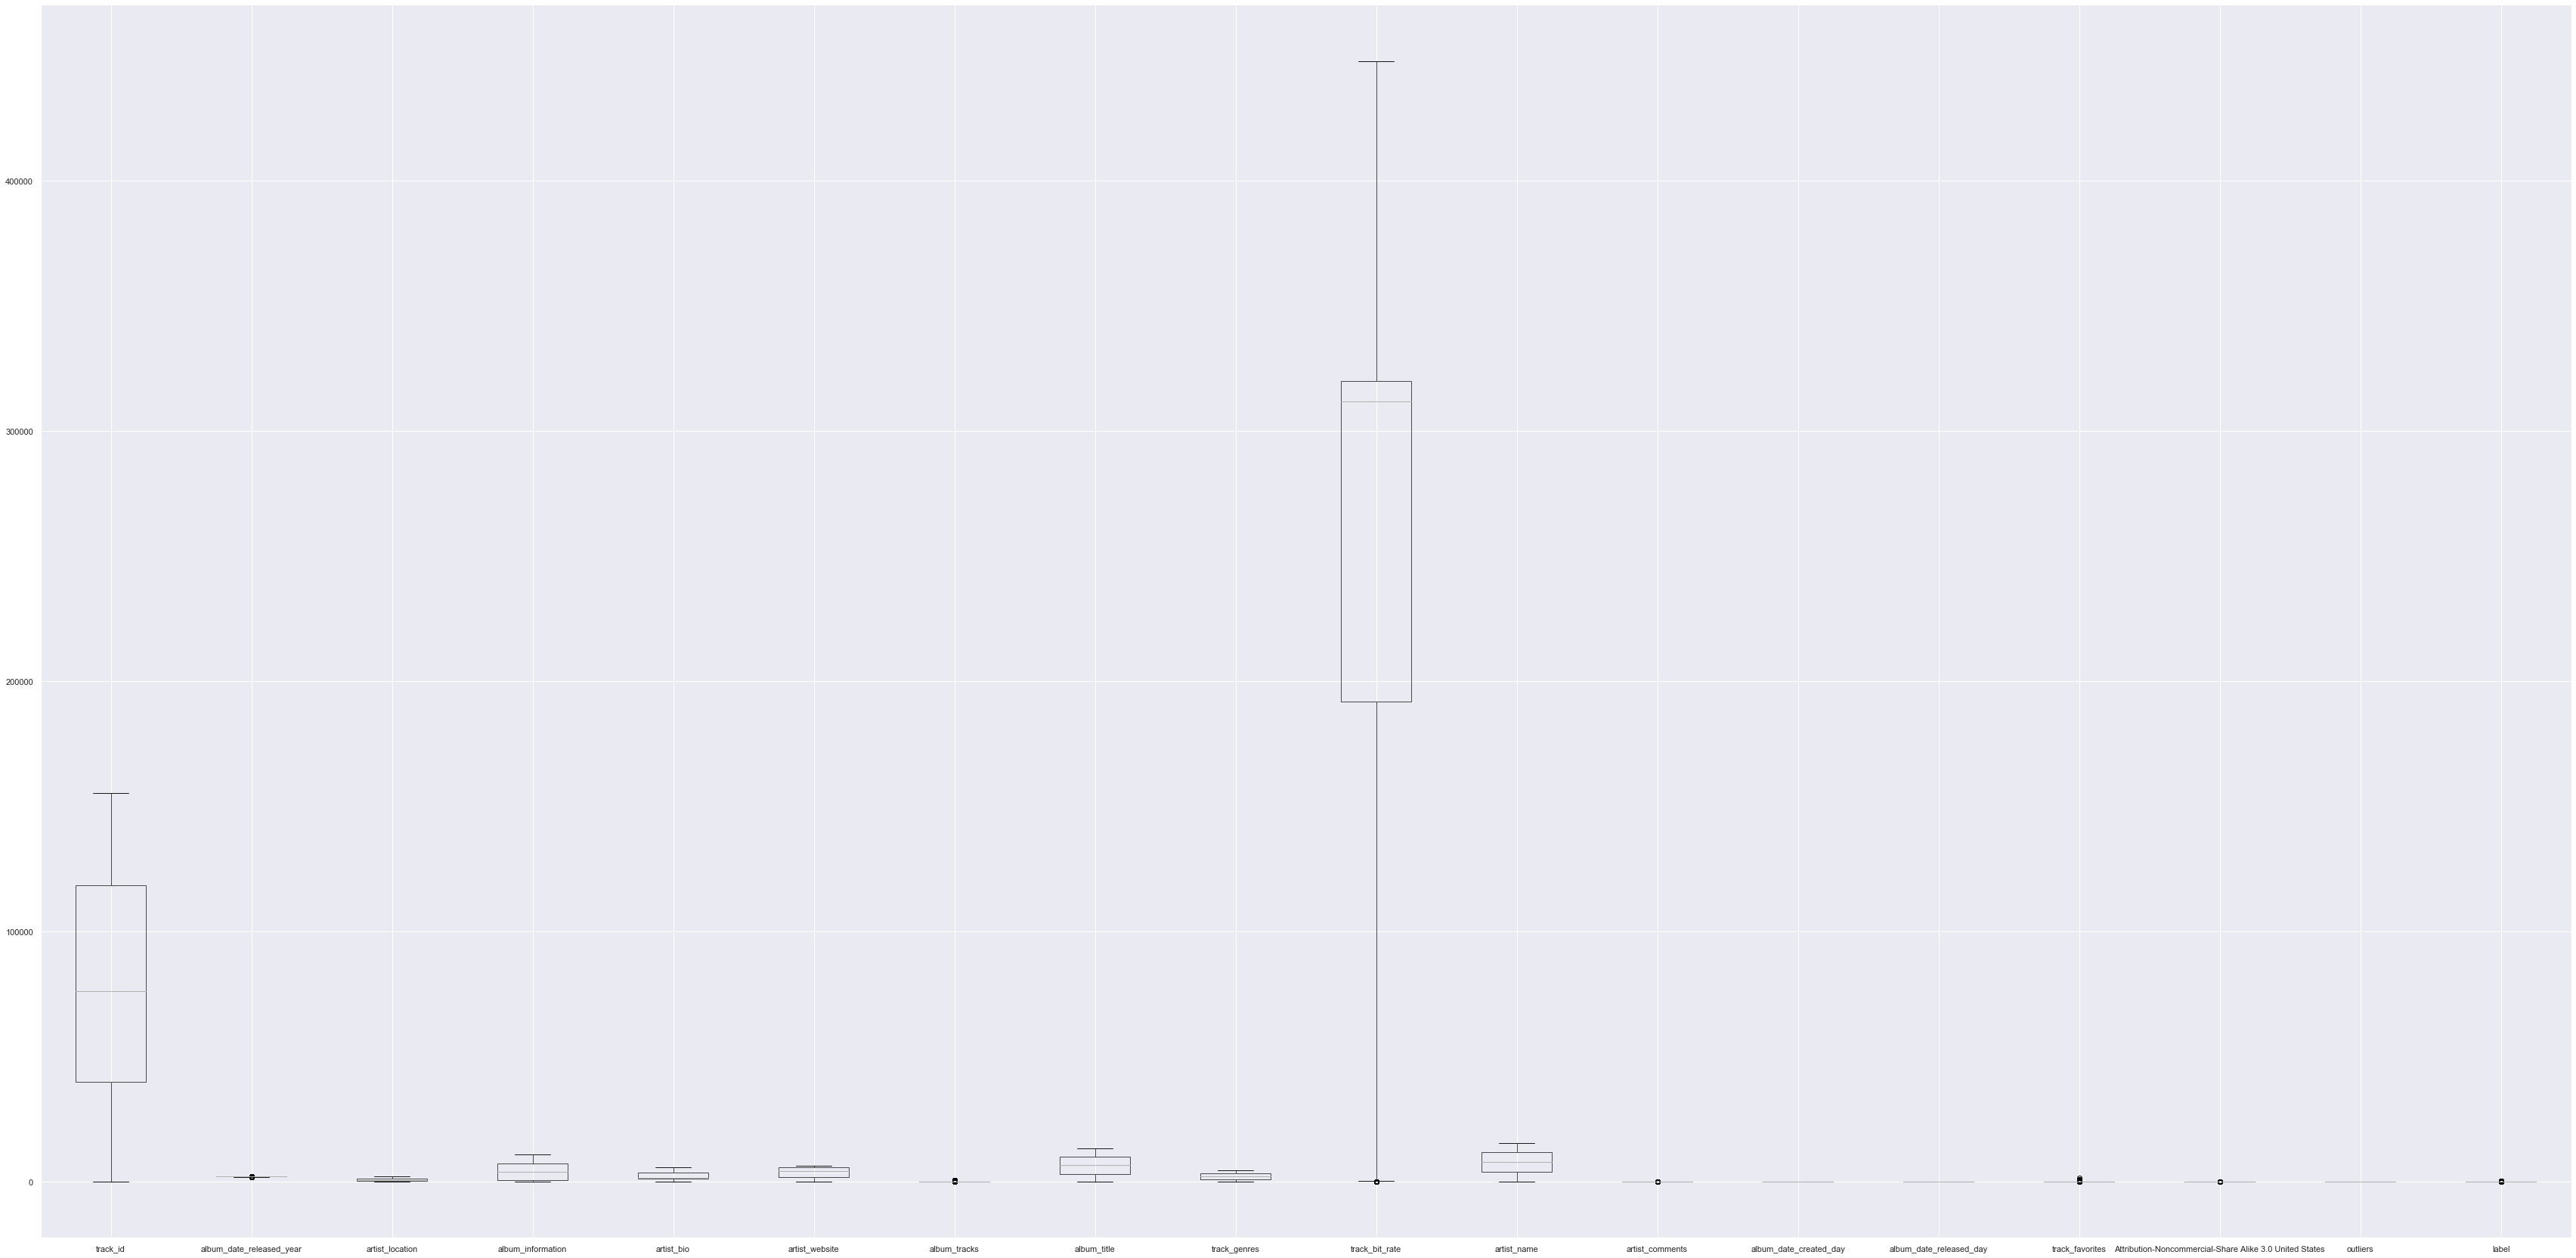

In [17]:
tracks.boxplot(figsize = [60,30]) #Display boxplots of attributes to visualize outliers

**LOF**

In [18]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression

In [19]:
clf = LocalOutlierFactor(n_neighbors=20)
outliers = clf.fit_predict(X)

In [20]:
clf.negative_outlier_factor_

array([ -1.02625454,  -1.02625164,  -1.02624586, ...,  -1.43785043,
        -1.4380224 , -43.60716835])

In [21]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 6717, 92687], dtype=int64))

In [22]:
np.where(outliers==-1)

(array([   12,    13,    20, ..., 99321, 99322, 99403], dtype=int64),)

In [23]:
clf.negative_outlier_factor_[np.where(outliers==-1)]

array([ -1.5028239 ,  -1.50269522,  -1.92438533, ..., -27.87560954,
       -27.87693708, -43.60716835])

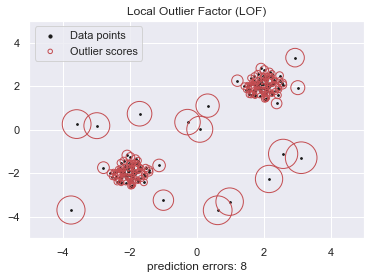

In [24]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [25]:
Xa.shape

(220, 2)

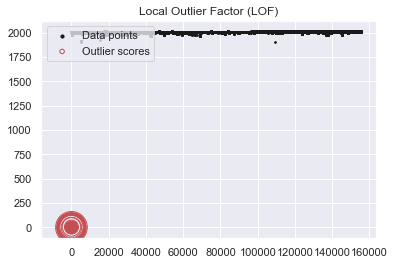

In [26]:
X_scores = clf.negative_outlier_factor_
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:,1], s=1000 * radius, edgecolors='r',facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [27]:
#np.max(clf.negative_outlier_factor_[np.where(outliers==-1)])

IndexError: index 245 is out of bounds for axis 0 with size 220

In [28]:
#np.min(clf.negative_outlier_factor_[np.where(outliers==-1)])

IndexError: index 245 is out of bounds for axis 0 with size 220

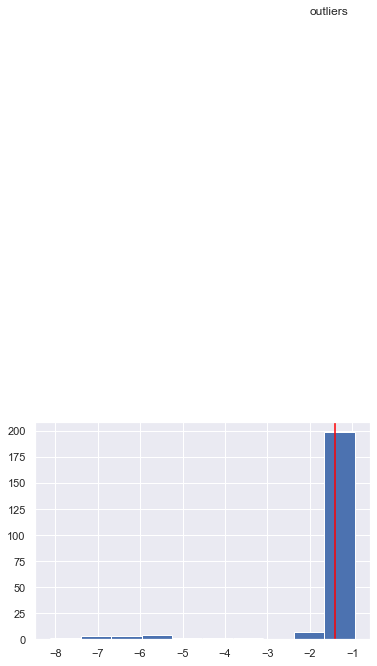

In [29]:
plt.hist(clf.negative_outlier_factor_)
plt.axvline(-1.4,c='red')
plt.text(-2, 600, 'outliers')
plt.show()

In [30]:
tracks['outliers'] = 0
for i in np.where(outliers==-1):
    tracks['outliers'][i] = 1

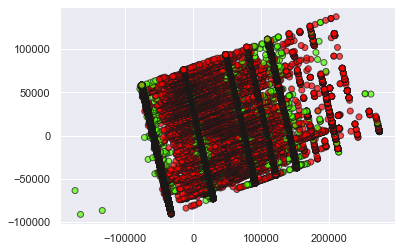

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tracks['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [32]:
clf = clf.negative_outlier_factor_
clf

array([-0.99994411, -1.14405944, -0.97422441, -1.29043229, -0.96406015,
       -0.967451  , -1.16897405, -1.17786476, -1.01083896, -1.14511932,
       -1.21255557, -1.05066867, -0.96961357, -1.02846721, -0.96108146,
       -1.30563699, -1.01782283, -1.09341031, -1.20053   , -1.048392  ,
       -1.04273309, -0.96537973, -1.12978593, -1.04714221, -1.1241528 ,
       -0.97795087, -0.97358493, -1.13261793, -0.98280096, -1.02069094,
       -0.95891097, -1.1491003 , -1.11886905, -0.99855726, -0.99357848,
       -1.13283666, -1.1460512 , -1.87981613, -0.95747372, -1.2240096 ,
       -0.9432555 , -1.25135605, -1.00309851, -1.10715506, -0.97725017,
       -0.99886729, -0.97739557, -1.09329811, -0.99310409, -0.96318902,
       -1.08969429, -0.97382438, -0.94892287, -1.42556212, -0.96379941,
       -1.27724298, -1.46492263, -0.94595752, -1.04083691, -1.1733885 ,
       -1.06562769, -1.29284358, -1.32423841, -1.06358314, -0.96642636,
       -1.08777278, -1.03217634, -1.24655122, -0.97201908, -1.09

In [33]:
from numpy import quantile, where, random
thresh = quantile(clf, .04)
print(thresh)

-5.643356320265135


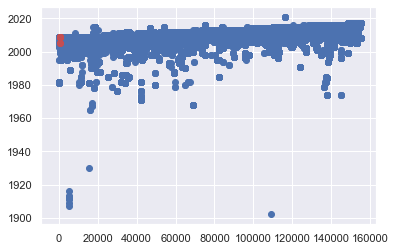

In [34]:
lofs_index = where(outliers==-1)
index = where(clf<=thresh)
values = X[index]
plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0],values[:,1], color='r')
plt.show()

**ISOLATION FOREST**

In [35]:
from sklearn.ensemble import IsolationForest

In [37]:
clf=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(.2),max_features=1.0)
clf.fit(tracks[['Attribution-Noncommercial-Share Alike 3.0 United States']])

IsolationForest(contamination=0.2, n_estimators=50)

In [39]:
tracks['scores']=clf.decision_function(tracks[['Attribution-Noncommercial-Share Alike 3.0 United States']])
tracks['anomaly_Value']=clf.predict(tracks[['Attribution-Noncommercial-Share Alike 3.0 United States']])
tracks.head(20)

,track_id,album_date_released_year,artist_location,album_information,artist_bio,artist_website,album_tracks,album_title,track_genres,track_bit_rate,artist_name,artist_comments,album_date_created_day,album_date_released_day,track_favorites,Attribution-Noncommercial-Share Alike 3.0 United States,outliers,label,scores,anomaly_Value
0,2,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,2,0,0,-1,5.551115e-17,1
1,3,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,1,0,0,-1,5.551115e-17,1
2,5,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,6,0,0,-1,5.551115e-17,1
3,10,2008,325,310,1623,1053,2,2119,713,192000,7052,3,26,6,178,0,0,-1,5.551115e-17,1
4,20,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,0,0,0,-1,5.551115e-17,1
5,26,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,0,0,0,-1,5.551115e-17,1
6,30,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,0,0,0,-1,5.551115e-17,1
7,46,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,0,0,0,-1,5.551115e-17,1
8,48,2009,498,10477,4679,5705,13,8103,4300,256000,9090,2,26,6,0,0,0,-1,5.551115e-17,1
9,134,2009,1275,1612,2004,2225,7,500,2355,256000,279,0,26,5,3,0,0,-1,5.551115e-17,1


In [40]:
anomaly=tracks.loc[tracks['anomaly_Value']==-1]
anomaly_index=list(anomaly.index)
anomaly

,track_id,album_date_released_year,artist_location,album_information,artist_bio,artist_website,album_tracks,album_title,track_genres,track_bit_rate,artist_name,artist_comments,album_date_created_day,album_date_released_day,track_favorites,Attribution-Noncommercial-Share Alike 3.0 United States,outliers,label,scores,anomaly_Value
22,148,2009,460,1072,4340,1405,1,2133,2108,256000,2759,0,26,15,1,1,0,-1,-0.11368,-1
85,226,2006,1495,310,1189,5705,0,1071,2507,197144,1329,0,26,1,4,1,0,-1,-0.11368,-1
86,228,2006,1495,310,1189,5705,0,1071,2507,190365,1329,0,26,1,2,1,0,-1,-0.11368,-1
87,236,2008,1388,4142,674,3613,1,1331,1703,320000,1370,3,26,1,24,1,0,-1,-0.11368,-1
90,246,2008,325,8024,2495,1391,3,8370,944,256000,1620,7,26,1,7,1,0,1,-0.11368,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99230,155051,2008,325,2801,1189,5705,12,7885,1398,320000,8099,0,23,1,1,1,0,1,-0.11368,-1
99231,155052,2008,325,2801,1189,5705,12,7885,1398,320000,7501,0,23,1,2,1,0,1,-0.11368,-1
99232,155053,2008,325,2801,1189,5705,12,7885,1398,320000,11059,0,23,1,2,1,0,1,-0.11368,-1
99233,155054,2008,325,2801,1189,5705,12,7885,1398,320000,9061,0,23,1,5,1,0,1,-0.11368,-1


In [42]:
outliers_counter = len(tracks[tracks['album_title'] > 3133])
outliers_counter

74891

In [43]:
print("Accuracy percentage:", 100*list(tracks['anomaly_Value']).count(-1)/(outliers_counter))

Accuracy percentage: 23.607643107983602


PyOD

In [7]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.loci import LOCI
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from pyod.models.auto_encoder import AutoEncoder

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

ABOD

In [9]:
clf = ABOD(n_neighbors=32)
clf.fit(X_sc)

ABOD(contamination=0.1, method='fast', n_neighbors=32)

In [10]:
clf.decision_scores_

array([-1.30161115e+17, -2.92807450e+17, -3.25562348e+16, ...,
       -2.22547598e+18, -6.14585844e+17, -4.86000567e-01])

In [11]:
outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

(array([1]), array([99404], dtype=int64))

In [12]:
np.mean(clf.decision_scores_[np.where(outliers==0)])

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [13]:
clf.decision_scores_.min()

-4.614548322319544e+18

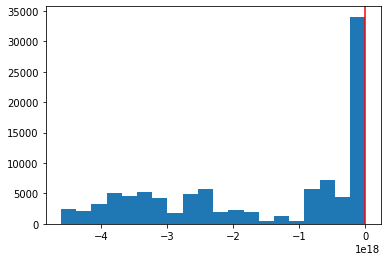

In [14]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.max(clf.decision_scores_[np.where(outliers==1)]), c='red')
plt.show()

KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Creating odd list K for KNN
neighbors = list(range(1,25,2))
# empty list that will hold cv scores
cv_scores = [ ]
#perform 10-fold cross-validation
for K in neighbors:
    knn = KNeighborsClassifier(n_neighbors = K)
    scores = cross_val_score(knn,X_train,y_train,cv = 10,scoring = "accuracy")
    cv_scores.append(scores.mean())

In [16]:
# Changing to mis classification error
mse = [1-x for x in cv_scores]
# determing best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal no. of neighbors is {}".format(optimal_k))

The optimal no. of neighbors is 1


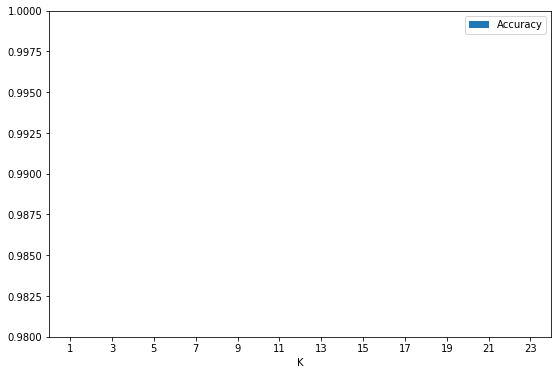

In [17]:
import matplotlib.pyplot as plt
def plot_accuracy(knn_list_scores):
    pd.DataFrame({"K":[i for i in range(1,25,2)], "Accuracy":knn_list_scores}).set_index("K").plot.bar(figsize= (9,6),ylim=(0.98,1),rot=0)
    plt.show()
plot_accuracy(cv_scores)

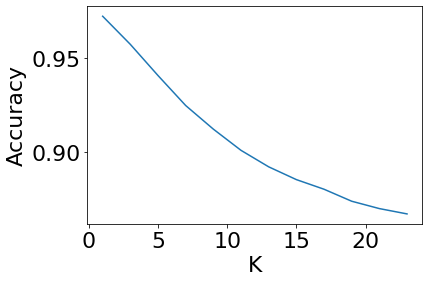

In [18]:
plt.plot(range(1,25,2), cv_scores)
plt.ylabel('Accuracy', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [19]:
clf_knn = KNN(contamination=0.5, n_neighbors = 15,n_jobs=-1)

clf_knn.fit(X_train)

KNN(algorithm='auto', contamination=0.5, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
  radius=1.0)

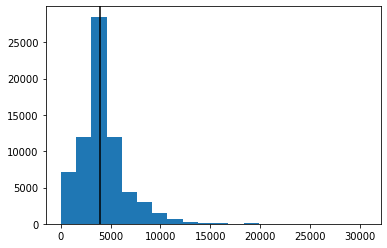

In [20]:
outliers = clf_knn.predict(X_train)
plt.hist(clf_knn.decision_scores_, bins=20)
plt.axvline(np.min(clf_knn.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [21]:
# Get the prediction labels of the training data 
y_train_pred = clf_knn.labels_ # binary labels (0: inliers, 1: outliers) 
# Outlier scores 
y_train_scores = clf_knn.decision_scores_

In [22]:
evaluate_print('KNN', y_train, y_train_scores)

KNN ROC:0.5721, precision @ rank n:0.2353


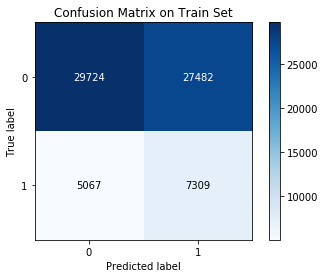

In [23]:
import scikitplot as skplt 
# plot the comfusion matrix in the train set 
skplt.metrics.plot_confusion_matrix(y_train,y_train_pred, normalize=False,title="Confusion Matrix on Train Set")
plt.show()

In [24]:
y_test_scores = clf_knn.decision_function(X_test)  # outlier scores

# Evaluate on the training data
evaluate_print('KNN', y_test,y_test_scores)

KNN ROC:0.5786, precision @ rank n:0.2374


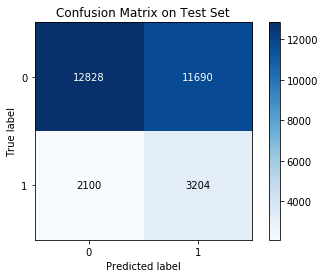

In [25]:
# plot the comfusion matrix  in the test set
y_preds = clf_knn.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize=False,
                                    title="Confusion Matrix on Test Set")
plt.show()

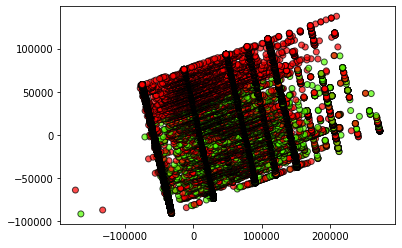

In [26]:
tracks['outliers'] = 0
for i in np.where(outliers==1):
    tracks['outliers'][i] = 1

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tracks['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

**AUTOENCODER**

In [27]:
clf = AutoEncoder(epochs=50, hidden_neurons=[4,2,2,4])

In [28]:
clf.fit(X)

outliers = clf.predict(X)
np.unique(outliers, return_counts=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

(array([0, 1]), array([89463,  9941], dtype=int64))

In [29]:
anomlay_score = clf.decision_function(X)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(anomlay_score.reshape(-1, 1))
line = scaler.transform(np.min(anomlay_score[np.where(outliers==1)]).reshape(1, -1))

In [31]:
len(anomlay_score[np.where(outliers==1)])

9941

In [32]:
outliers_proba = clf.predict_proba(X)

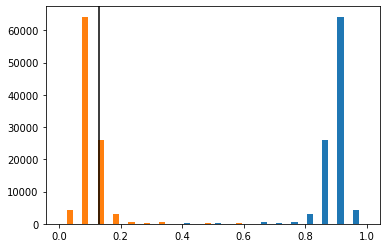

In [33]:
plt.hist(outliers_proba, bins=20)
plt.axvline(line, c='k')
plt.show()

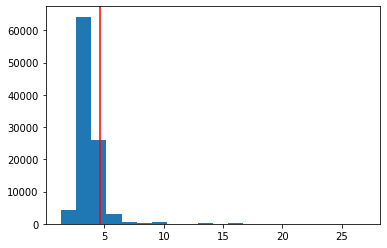

In [34]:
plt.hist(anomlay_score, bins=20)
plt.axvline(np.min(anomlay_score[np.where(outliers==1)]), c='red')
plt.show()

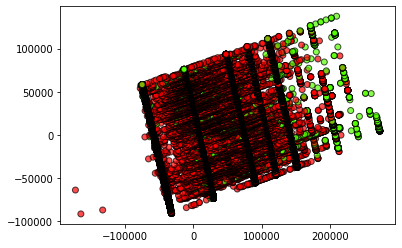

In [35]:
tracks['outliers'] = 0
for i in np.where(outliers==1):
    tracks['outliers'][i] = 1

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tracks['outliers'], cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

**Grubbs Test**

In [8]:
import numpy as np
from scipy import stats

In [44]:
alpha = 0.95

In [41]:
n = len(tracks)

In [42]:
n

106486

In [45]:
significance_level = alpha / (2*n)  #alpha / n

In [46]:
significance_level

4.460680277219541e-06

In [47]:
t = stats.t.isf(significance_level, n-2)

In [48]:
t

4.442006185157423

In [49]:
g_test = ((n-1) / np.sqrt(n)) * (np.sqrt(t**2 / (n-2 + t**2)))

In [50]:
g_test

4.441594692048268

In [51]:
data = np.array([100, 5, 14, 15, 15, 14, 19, 17, 16, 20, 22, 8, 21, 28, 11, 9, 50])
relative_values = abs(data - data.mean())
index = relative_values.argmax()
value = relative_values[index]

In [52]:
g = value / data.std()

In [53]:
g, g_test

(3.574292659277283, 4.441594692048268)

In [54]:
if g > g_test:
    print('outlier')
else:
    print('inlier')

inlier


In [ ]:
stats.t.isf(0.01, 10)

2.7637694574478893

**Likelihood Approach**

In [27]:
import numpy as np
from scipy import stats

In [28]:
def norm_dist(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.e**(-((x-mu)**2)/(2*sigma**2))
              
def unif_dist(x, n):
    return 1/n

In [29]:
M = np.copy(tracks)
A = list()
muM = np.mean(tracks)
sigmaM = np.std(tracks)

In [30]:
norm_dist(15, muM, sigmaM)

album_comments                                            1.798193e-10
album_favorites                                           8.869326e-06
album_id                                                  7.937277e-06
album_listens                                             2.634289e-06
album_tracks                                              9.914351e-03
album_type                                                3.924883e-61
artist_comments                                           7.279797e-03
artist_favorites                                          3.923335e-03
artist_location                                           2.609795e-04
artist_name                                               1.806908e-05
artist_tags                                               1.816661e-05
track_bit_rate                                            3.020688e-09
track_comments                                            0.000000e+00
track_duration                                            9.065239e-04
track_

In [31]:
M = np.copy(tracks)
A = list()
lambda_par = 0.3

muM = np.mean(M)
sigmaM = np.std(M)
sizeA = len(A)
sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
sumA = np.sum([unif_dist(x, sizeA) for x in A])
ll = -(len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)

In [32]:
M = np.copy(tracks)
A = list()
c = 0.2
for i, x in enumerate(tracks):
    A.append(x)
    M = np.array([xo for j, xo in enumerate(data) if i!=j])
    muM = np.mean(M)
    sigmaM = np.std(M)
    sizeA = len(A)
    sumM = np.sum([norm_dist(x, muM, sigmaM) for x in M])
    sumA = np.sum([unif_dist(x, sizeA) for x in A])
    ll_xi = - (len(M) * np.log(1-lambda_par) + sumM + len(A) * np.log(lambda_par) + sumA)
    delta_ll = ll - ll_xi
    print(i, delta_ll, 'outlier' if delta_ll > c else 'inlier')
    M = np.copy(data)
    A = list()

0 0.15236733109486522 inlier
1 0.15236698754597455 inlier
2 0.15237820167385507 inlier
3 0.15234391097328626 inlier
4 0.15237571277248207 inlier
5 0.1523802512238035 inlier
6 0.1523784684977727 inlier
7 0.15238078498805407 inlier
8 0.15236985823139548 inlier
9 0.1523761334392475 inlier
10 0.15236719955282751 inlier
11 0.1523726455779979 inlier
12 0.15237512045132462 inlier
13 0.15237516954221064 inlier
14 0.1522977037166129 inlier
15 0.1523048363160342 inlier
16 0.1523034319470753 inlier
17 0.15230477987643098 inlier
18 0.15238047394086607 inlier
19 0.1523660634557018 inlier
20 0.15236766965972492 inlier
21 0.15237383038038388 inlier
22 0.15236615458707092 inlier
23 0.15239650351577438 inlier
24 0.15238649818638805 inlier
25 0.15233955936855637 inlier
26 0.1523395663680276 inlier
27 0.1523684125422733 inlier
28 0.15237593805068173 inlier
29 0.1523307186726015 inlier
30 0.15233887470094487 inlier
31 0.15233888335205847 inlier
32 0.1523388754867483 inlier
33 0.15233888774673687 inlier
34